In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

In [14]:
df = pd.read_csv("../../ProtWaveVAE/Pfam_analysis/outputs/prediction/pfam/DHFR/DHFR_train_dataset_inference.csv")
z_columns = ['z_0', 'z_1', 'z_2', 'z_3', 'z_4', 'z_5']
filtered_df = df[df['phylogeny'].str.contains('Eukaryota|Firmicutes|Actinobacteria', regex=True)].copy()
filtered_df['phylogeny'] = filtered_df['phylogeny'].str.extract('(Eukaryota|Firmicutes|Actinobacteria)', expand=False)

In [15]:
df

,id,function,organism,phylogeny,Sequence,Unaligned_Sequence,z_0,z_1,z_2,z_3,z_4,z_5,z_0_mode,z_1_mode,z_2_mode,z_3_mode,z_4_mode,z_5_mode
0,B7N7S3_ECOLU|Dihydrofolate,Dihydrofolate reductase EC=1.5.1.3,Escherichia coli O17:K52:H18 (strain UMN026 / ...,"Bacteria,Proteobacteria,Gammaproteobacteria,En...",ISLIAALAVDRVIGMENAMPWNLPADLAWFKRNTLKPVIMGRHTWE...,ISLIAALAVDRVIGMENAMPWNLPADLAWFKRNTLKPVIMGRHTWE...,0.608591,0.877570,0.547845,0.378809,1.029811,0.208592,0.010123,0.064482,-0.023382,0.014914,0.034800,0.008511
1,A5WHY1_PSYWF|Dihydrofolate,Dihydrofolate reductase EC=1.5.1.3,Psychrobacter sp. (strain PRwf-1),"Bacteria,Proteobacteria,Gammaproteobacteria,Ps...",VAQIVAISRNRCIGKGNDLPWHIPNDLKHFKAMTTEIVIMGRKTFE...,VAQIVAISRNRCIGKGNDLPWHIPNDLKHFKAMTTEIVIMGRKTFE...,0.078506,0.177584,0.285146,0.937846,0.974716,1.224732,0.073061,0.125879,0.219956,0.071677,0.150931,0.189280
2,F7ETL3_ORNAN|Uncharacterized,Uncharacterized protein (Fragment),Ornithorhynchus anatinus (Duckbill platypus),"Eukaryota,Metazoa,Chordata,Craniata,Vertebrata...",-------------------------EFRYFQKMTTNLVIMGKKTWF...,EFRYFQKMTTNLVIMGKKTWFSIPRPLKDRINIVLSRELKEPPGAH...,0.323644,0.916844,0.639861,0.438445,0.263315,1.065905,0.065707,0.089951,0.092454,0.031102,0.073827,0.167414
3,B5ARG6_CHLPS|FolA|Chlamydophila,FolA,Chlamydophila psittaci (Chlamydia psittaci),"Bacteria,Chlamydiae,Chlamydiales,Chlamydiaceae...",ILGIVACDPRGVMGKQGKLPWNYPEDIEFFSKTIGHVLIMGRKTFE...,ILGIVACDPRGVMGKQGKLPWNYPEDIEFFSKTIGHVLIMGRKTFE...,0.191421,0.261753,0.466213,0.577860,0.461203,0.600805,0.038903,0.001221,-0.041989,0.075482,-0.004464,-0.179762
4,G3XVI0_ASPNA|Dihydrofolate,Dihydrofolate reductase,Aspergillus niger (strain ATCC 1015 / CBS 113....,"Eukaryota,Fungi,Dikarya,Ascomycota,Pezizomycot...",-----------GIGHSGTLPWRIKTDMSFFARVTTNAIIMGRKTYD...,GIGHSGTLPWRIKTDMSFFARVTTNAIIMGRKTYDSVPRPLAKRIS...,0.758347,0.287981,0.081633,0.100747,0.509806,0.785633,-0.051937,-0.025569,-0.088953,-0.033265,-0.045846,-0.029288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1754,D2RRK6_HALTV|Dihydrofolate,Dihydrofolate reductase EC=1.5.1.3,Haloterrigena turkmenica (strain ATCC 51198 / ...,"Archaea,Euryarchaeota,Halobacteria,Halobacteri...",LVGIVAVADNGVIGKDGDMPWHIPADLKHFKETTMHPIIMGRVTYE...,LVGIVAVADNGVIGKDGDMPWHIPADLKHFKETTMHPIIMGRVTYE...,0.051495,0.630673,0.868145,0.516807,0.274467,0.181724,0.026167,-0.018879,0.043523,0.073276,-0.020506,0.053586
1755,Q03S94_LACBA|Dihydrofolate,Dihydrofolate reductase EC=1.5.1.3,Lactobacillus brevis (strain ATCC 367 / JCM 1170),"Bacteria,Firmicutes,Lactobacillales,Lactobacil...",LIFLWAESQGRVIGLHGGLPWHLPADMHYFKTVTTHTIVAGSKTFA...,LIFLWAESQGRVIGLHGGLPWHLPADMHYFKTVTTHTIVAGSKTFA...,0.836909,0.769562,0.838799,0.939353,1.097045,1.061348,0.132449,0.075711,0.080762,0.061136,0.091839,0.133599
1756,B7U9E8_9ENTR|Dihydrofolate,Dihydrofolate reductase DFHRXVII,Shigella sp. ER.1.23,"Bacteria,Proteobacteria,Gammaproteobacteria,En...",ISLISAVSENGVIGSGPDIPWSVKGEQLLFKALTYQWLLVGRKTFD...,ISLISAVSENGVIGSGPDIPWSVKGEQLLFKALTYQWLLVGRKTFD...,0.161097,0.363962,0.735262,0.628305,0.997671,0.196857,0.159411,0.075714,0.101307,0.129338,0.086696,0.086401
1757,D7IBT8_9BACE|Dihydrofolate,Dihydrofolate reductase EC=1.5.1.3,Bacteroides sp. 1_1_14,"Bacteria,Bacteroidetes,Bacteroidia,Bacteroidal...",ISIIAAVDRRMAIGFQNKLLFWLPNDLKRFKALTTNTIIMGRKTFE...,ISIIAAVDRRMAIGFQNKLLFWLPNDLKRFKALTTNTIIMGRKTFE...,0.236859,1.016493,0.991117,0.560066,0.169459,0.118891,0.113603,0.072413,0.058164,0.033740,0.098904,0.052121


In [13]:
df

,id,function,organism,phylogeny,Sequence,Unaligned_Sequence,z_0,z_1,z_2,z_3,z_4,z_5,z_0_mode,z_1_mode,z_2_mode,z_3_mode,z_4_mode,z_5_mode
0,B7N7S3_ECOLU|Dihydrofolate,Dihydrofolate reductase EC=1.5.1.3,Escherichia coli O17:K52:H18 (strain UMN026 / ...,"Bacteria,Proteobacteria,Gammaproteobacteria,En...",ISLIAALAVDRVIGMENAMPWNLPADLAWFKRNTLKPVIMGRHTWE...,ISLIAALAVDRVIGMENAMPWNLPADLAWFKRNTLKPVIMGRHTWE...,0.635428,0.920481,0.509318,0.373415,1.056382,0.214873,0.038037,0.105217,-0.053697,0.013991,0.063716,0.018284
1,A5WHY1_PSYWF|Dihydrofolate,Dihydrofolate reductase EC=1.5.1.3,Psychrobacter sp. (strain PRwf-1),"Bacteria,Proteobacteria,Gammaproteobacteria,Ps...",VAQIVAISRNRCIGKGNDLPWHIPNDLKHFKAMTTEIVIMGRKTFE...,VAQIVAISRNRCIGKGNDLPWHIPNDLKHFKAMTTEIVIMGRKTFE...,0.043103,0.269800,0.398510,0.990488,1.065997,1.323905,0.037761,0.217088,0.331137,0.112903,0.231133,0.269246
2,F7ETL3_ORNAN|Uncharacterized,Uncharacterized protein (Fragment),Ornithorhynchus anatinus (Duckbill platypus),"Eukaryota,Metazoa,Chordata,Craniata,Vertebrata...",-------------------------EFRYFQKMTTNLVIMGKKTWF...,EFRYFQKMTTNLVIMGKKTWFSIPRPLKDRINIVLSRELKEPPGAH...,0.298538,0.953794,0.657010,0.414073,0.309372,1.116441,0.044186,0.124044,0.112037,0.009483,0.119121,0.215633
3,B5ARG6_CHLPS|FolA|Chlamydophila,FolA,Chlamydophila psittaci (Chlamydia psittaci),"Bacteria,Chlamydiae,Chlamydiales,Chlamydiaceae...",ILGIVACDPRGVMGKQGKLPWNYPEDIEFFSKTIGHVLIMGRKTFE...,ILGIVACDPRGVMGKQGKLPWNYPEDIEFFSKTIGHVLIMGRKTFE...,0.179518,0.302437,0.446990,0.581754,0.518276,0.496677,0.029766,0.042256,-0.050989,0.086000,0.054187,-0.247631
4,G3XVI0_ASPNA|Dihydrofolate,Dihydrofolate reductase,Aspergillus niger (strain ATCC 1015 / CBS 113....,"Eukaryota,Fungi,Dikarya,Ascomycota,Pezizomycot...",-----------GIGHSGTLPWRIKTDMSFFARVTTNAIIMGRKTYD...,GIGHSGTLPWRIKTDMSFFARVTTNAIIMGRKTYDSVPRPLAKRIS...,0.745038,0.280097,0.067318,0.118499,0.505300,0.733929,-0.050516,-0.027936,-0.097891,-0.012211,-0.042419,-0.051543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1754,D2RRK6_HALTV|Dihydrofolate,Dihydrofolate reductase EC=1.5.1.3,Haloterrigena turkmenica (strain ATCC 51198 / ...,"Archaea,Euryarchaeota,Halobacteria,Halobacteri...",LVGIVAVADNGVIGKDGDMPWHIPADLKHFKETTMHPIIMGRVTYE...,LVGIVAVADNGVIGKDGDMPWHIPADLKHFKETTMHPIIMGRVTYE...,0.100103,0.583677,0.906694,0.576332,0.190594,0.233134,0.074702,-0.054663,0.083783,0.134565,-0.096797,0.105045
1755,Q03S94_LACBA|Dihydrofolate,Dihydrofolate reductase EC=1.5.1.3,Lactobacillus brevis (strain ATCC 367 / JCM 1170),"Bacteria,Firmicutes,Lactobacillales,Lactobacil...",LIFLWAESQGRVIGLHGGLPWHLPADMHYFKTVTTHTIVAGSKTFA...,LIFLWAESQGRVIGLHGGLPWHLPADMHYFKTVTTHTIVAGSKTFA...,0.832281,0.798559,0.867097,0.962848,1.183172,1.059571,0.126334,0.100412,0.100041,0.072717,0.163193,0.128005
1756,B7U9E8_9ENTR|Dihydrofolate,Dihydrofolate reductase DFHRXVII,Shigella sp. ER.1.23,"Bacteria,Proteobacteria,Gammaproteobacteria,En...",ISLISAVSENGVIGSGPDIPWSVKGEQLLFKALTYQWLLVGRKTFD...,ISLISAVSENGVIGSGPDIPWSVKGEQLLFKALTYQWLLVGRKTFD...,0.208882,0.417922,0.712718,0.656782,1.045221,0.177012,0.207199,0.130509,0.087617,0.157993,0.133818,0.068476
1757,D7IBT8_9BACE|Dihydrofolate,Dihydrofolate reductase EC=1.5.1.3,Bacteroides sp. 1_1_14,"Bacteria,Bacteroidetes,Bacteroidia,Bacteroidal...",ISIIAAVDRRMAIGFQNKLLFWLPNDLKRFKALTTNTIIMGRKTFE...,ISIIAAVDRRMAIGFQNKLLFWLPNDLKRFKALTTNTIIMGRKTFE...,0.273617,1.096089,1.012637,0.557368,0.232281,0.129692,0.149951,0.143221,0.073893,0.026714,0.161642,0.062511


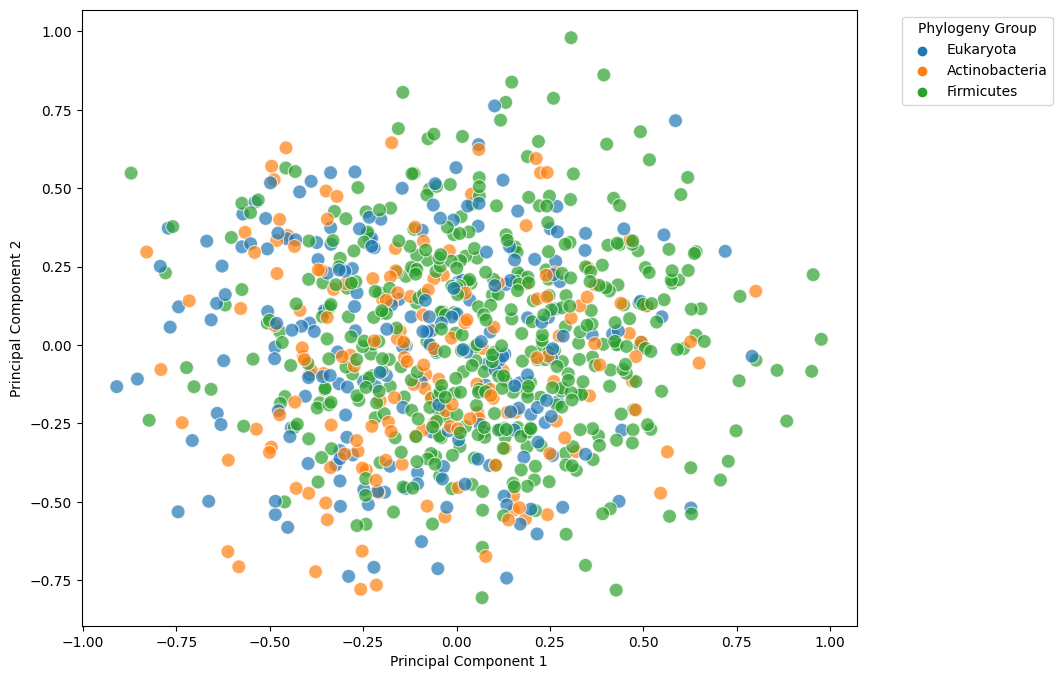

In [16]:
# beta = 1.5
pca = PCA(n_components=2)
pca_result = pca.fit_transform(filtered_df[z_columns])
filtered_df['PCA1'] = pca_result[:, 0]
filtered_df['PCA2'] = pca_result[:, 1]

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='phylogeny', data=filtered_df, palette='tab10', s=100, alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Phylogeny Group", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

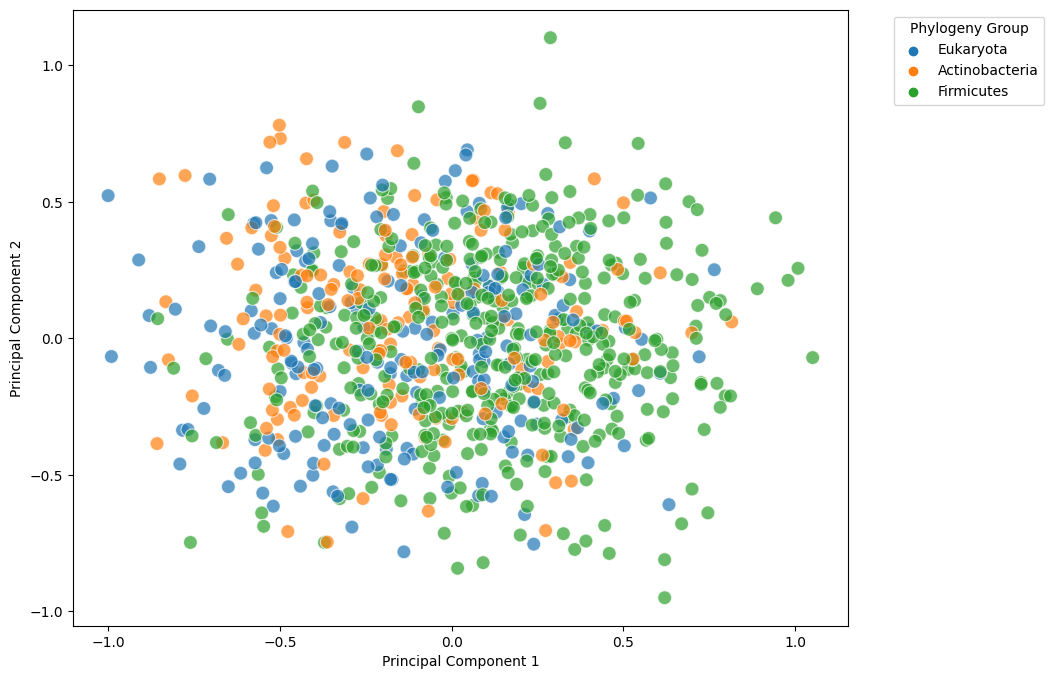

In [10]:
# beta = 1
pca = PCA(n_components=2)
pca_result = pca.fit_transform(filtered_df[z_columns])
filtered_df['PCA1'] = pca_result[:, 0]
filtered_df['PCA2'] = pca_result[:, 1]

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='phylogeny', data=filtered_df, palette='tab10', s=100, alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Phylogeny Group", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

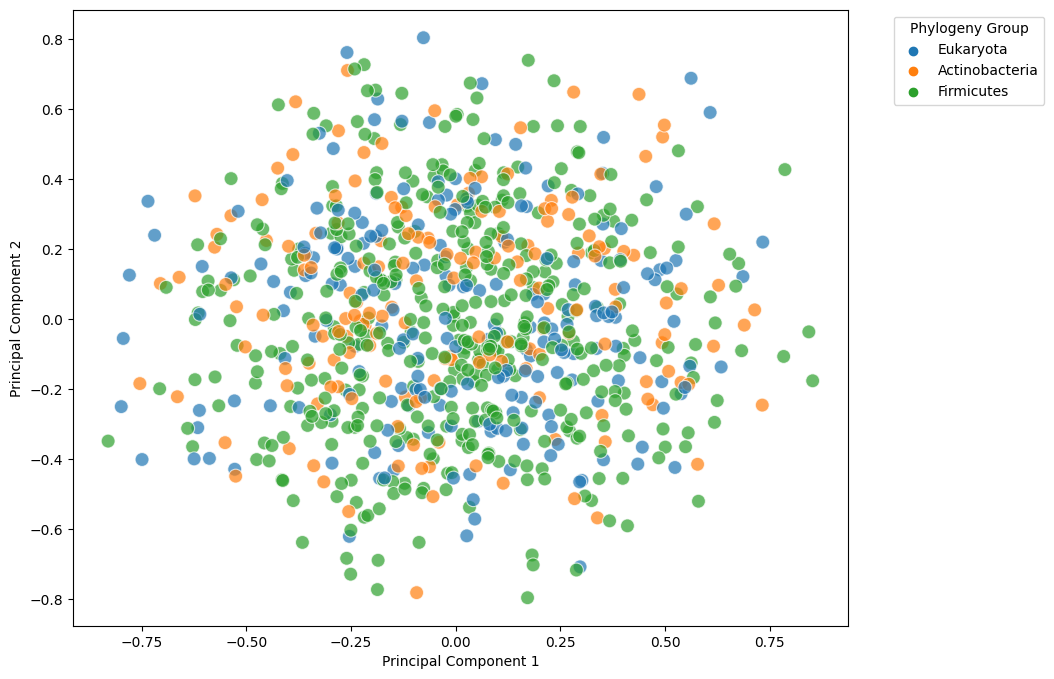

In [7]:
# beta = 10
pca = PCA(n_components=2)
pca_result = pca.fit_transform(filtered_df[z_columns])
filtered_df['PCA1'] = pca_result[:, 0]
filtered_df['PCA2'] = pca_result[:, 1]

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='phylogeny', data=filtered_df, palette='tab10', s=100, alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Phylogeny Group", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

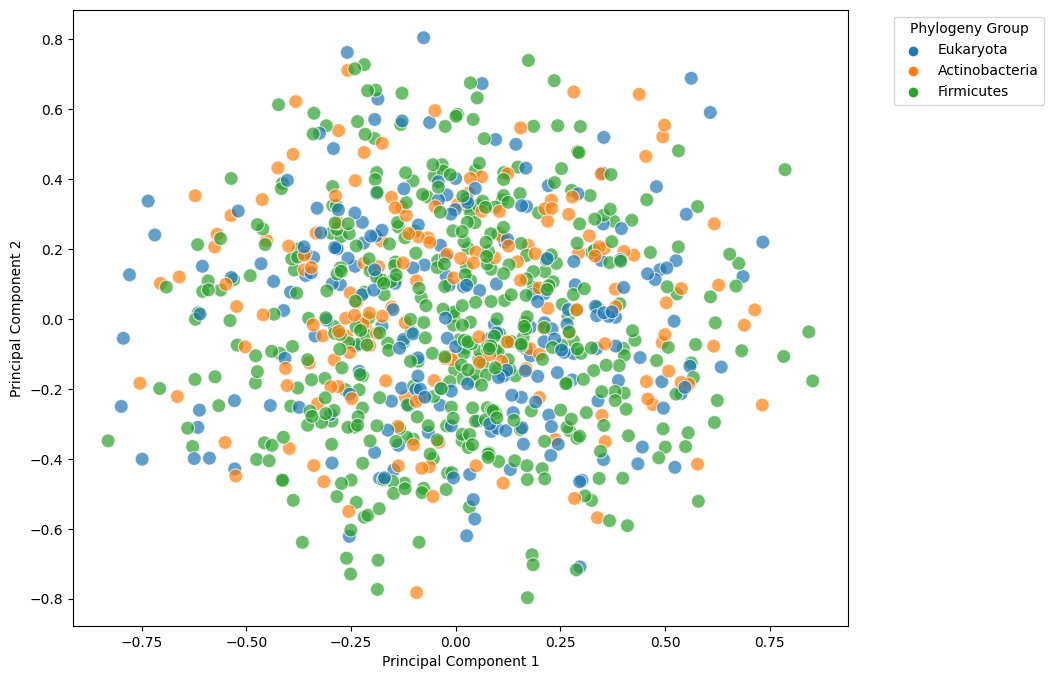

In [4]:
# beta = 4
pca = PCA(n_components=2)
pca_result = pca.fit_transform(filtered_df[z_columns])
filtered_df['PCA1'] = pca_result[:, 0]
filtered_df['PCA2'] = pca_result[:, 1]

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='phylogeny', data=filtered_df, palette='tab10', s=100, alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Phylogeny Group", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()